##Importing Libraries and dataset

In [30]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from dateutil import parser;
dataset=pd.read_csv('/content/appdata10.csv', engine='python');
print("Dataset Extracted");

Dataset Extracted


##Dataset Description and Extracting

In [31]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [32]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
#Data Cleaning
dataset.hour=dataset.hour.str.slice(1,3).astype(int);
num_dataset=dataset.drop(columns=['user','first_open','screen_list','enrolled','enrolled_date'],axis=1);
num_dataset.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


##Data Visualization

/tmp/ipython-input-34-1152002823.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset.age,shade=True);


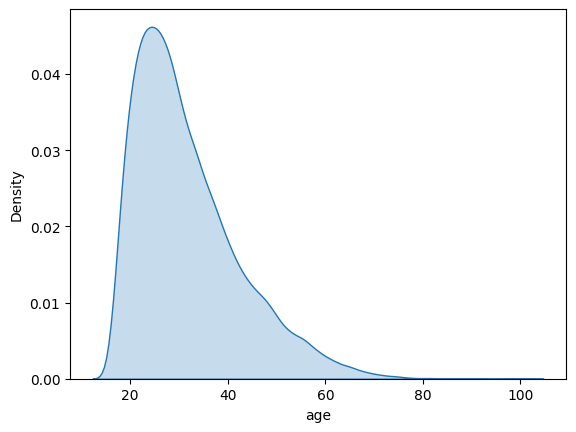

In [34]:
sns.kdeplot(data=dataset.age,shade=True);

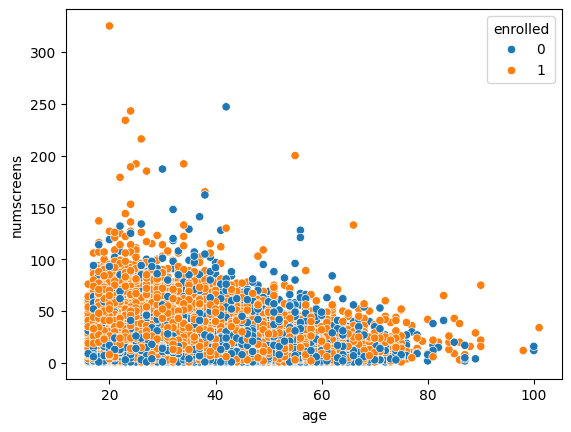

In [35]:
sns.scatterplot(x=dataset.age,y=dataset.numscreens,hue=dataset.enrolled);

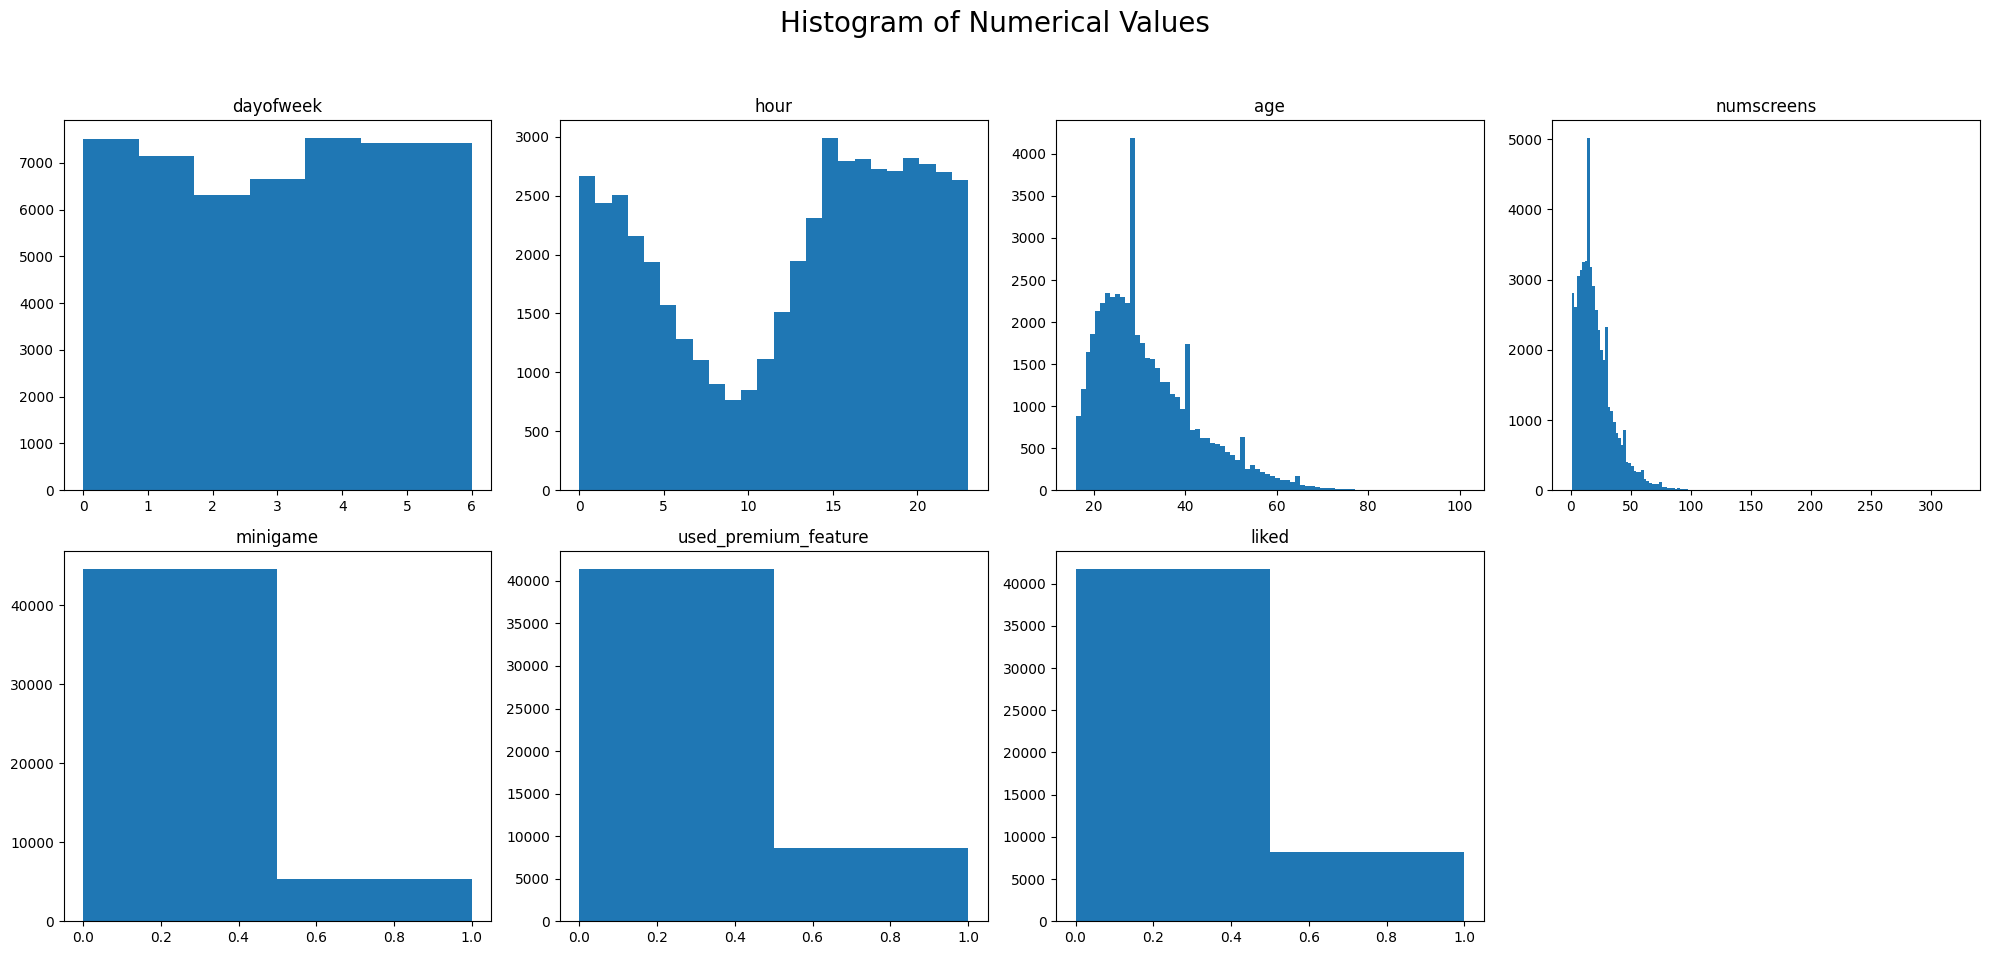

In [36]:
plt.figure(figsize=(20,10));
plt.suptitle("Histogram of Numerical Values",fontsize=20);
for i in range(0,num_dataset.shape[1]):
  plt.subplot(2,4,i+1);
  f=plt.gca();
  f.set_title(num_dataset.columns[i]);
  vals=num_dataset.iloc[:,i].nunique();
  plt.hist(num_dataset.iloc[:,i],bins=vals);
plt.tight_layout(rect=[0,0.03,1,0.95]);
#plt.savefig('Histogram.jpg')

###Correlation with Target Variable

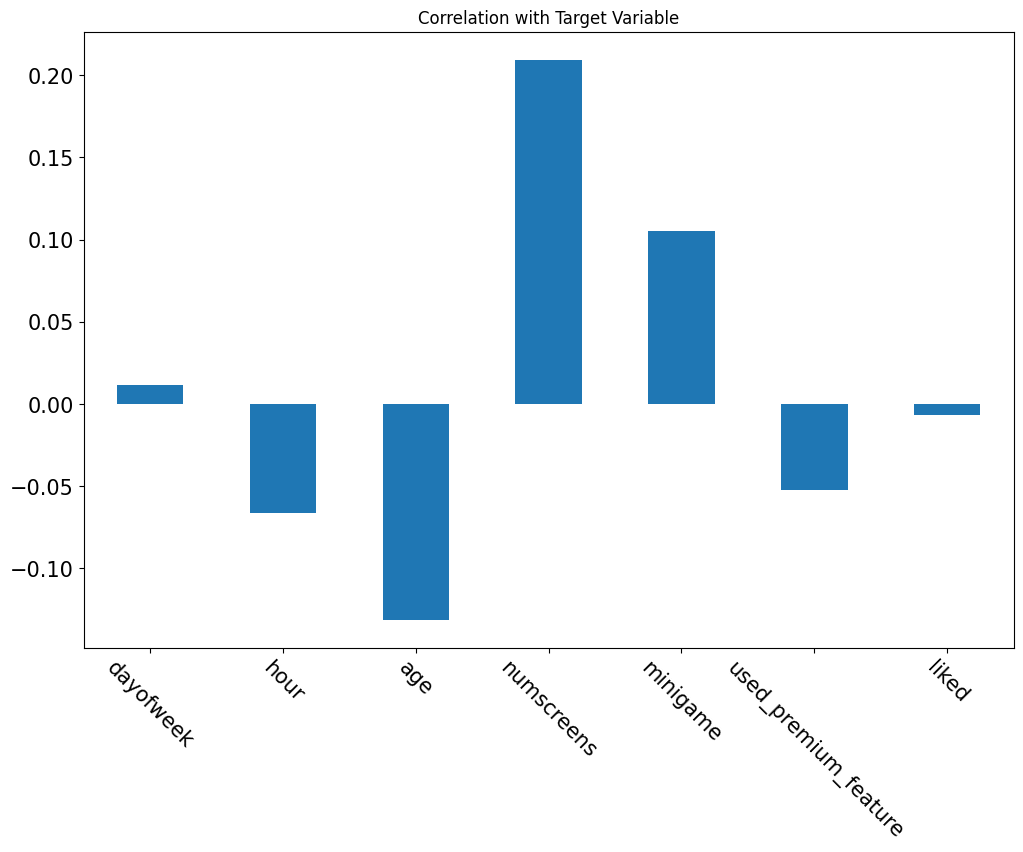

In [37]:
num_dataset.corrwith(dataset.enrolled).plot.bar(figsize=(12,8),fontsize=15,title="Correlation with Target Variable",rot=-45);

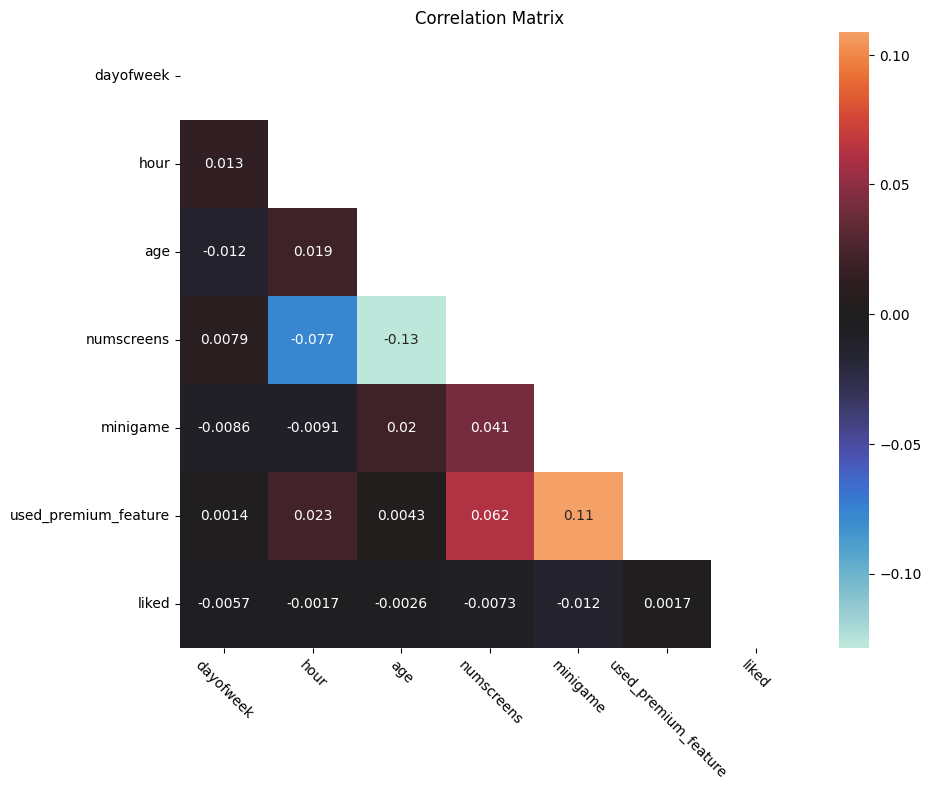

In [38]:
plt.figure(figsize=(10,8));
corr=num_dataset.corr();
mask=np.zeros_like(corr,dtype=np.bool);
mask[np.triu_indices_from(mask)]=True;
plt.title("Correlation Matrix");
sns.heatmap(corr,mask=mask,annot=True,center=0);
plt.xticks(rotation=-45);

##Feature Engineering

###Analysing Date Column

In [39]:
date_dataset=dataset.copy()
date_dataset.dropna(inplace=True);
date_dataset.reset_index(inplace=True);
dataset.drop(columns=['first_open','enrolled_date'],axis=1,inplace=True);
date_dataset.drop(columns=dataset.columns,axis=1,inplace=True);
print(date_dataset.head());
print(date_dataset.dtypes);

   index               first_open            enrolled_date
0      3  2013-07-05 16:08:46.354  2013-07-05 16:11:49.513
1      4  2013-02-26 18:50:48.661  2013-02-26 18:56:37.841
2      5  2013-04-03 09:58:15.752  2013-04-03 09:59:03.291
3      8  2013-03-20 14:22:01.569  2013-04-27 22:24:54.542
4      9  2013-04-26 18:22:16.013  2013-04-26 18:31:58.923
index             int64
first_open       object
enrolled_date    object
dtype: object


In [40]:
date_dataset['first_open'] = pd.to_datetime(date_dataset['first_open'], errors='coerce')
date_dataset['enrolled_date'] = pd.to_datetime(date_dataset['enrolled_date'], errors='coerce')
date_dataset['diff']=(date_dataset.enrolled_date-date_dataset.first_open).astype('timedelta64[ns]').astype(int) / (10**9 * 60 * 60);
print(date_dataset.head());
print(date_dataset.dtypes);

   index              first_open           enrolled_date        diff
0      3 2013-07-05 16:08:46.354 2013-07-05 16:11:49.513    0.050877
1      4 2013-02-26 18:50:48.661 2013-02-26 18:56:37.841    0.096994
2      5 2013-04-03 09:58:15.752 2013-04-03 09:59:03.291    0.013205
3      8 2013-03-20 14:22:01.569 2013-04-27 22:24:54.542  920.048048
4      9 2013-04-26 18:22:16.013 2013-04-26 18:31:58.923    0.161919
index                     int64
first_open       datetime64[ns]
enrolled_date    datetime64[ns]
diff                    float64
dtype: object


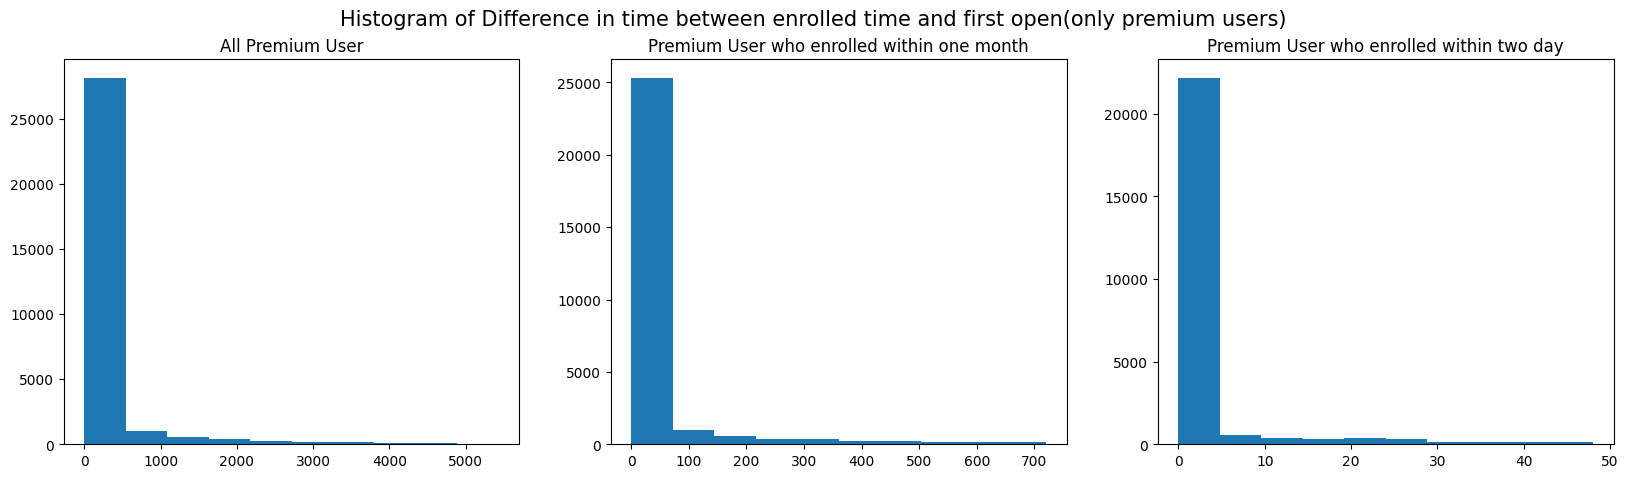

In [41]:
plt.figure(figsize=(20,5));
plt.suptitle("Histogram of Difference in time between enrolled time and first open(only premium users)",fontsize=15);
plt.subplot(1,3,1);
plt.hist(date_dataset['diff']);
plt.title("All Premium User");
plt.subplot(1,3,2);
plt.hist(date_dataset['diff'],range=(0,720));
plt.title("Premium User who enrolled within one month");
plt.subplot(1,3,3);
plt.hist(date_dataset['diff'],range=(0,48));
plt.title("Premium User who enrolled within two day");
plt.show();

67.2% Percentage of Premium User enrolled within one hour
20.2% Percentage of Premium User enrolled after 2 days


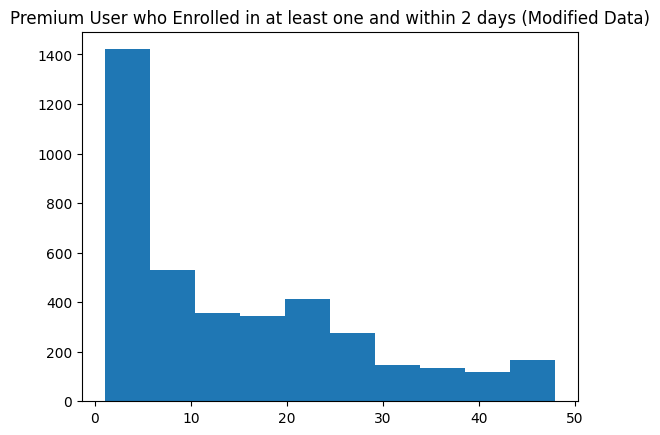

In [42]:
# Calculate the number of users needed to have a diff <= 1 hour to reach 65%
total_users = date_dataset.shape[0]
target_instant_users = int(total_users * 0.65)

# Find the current instant users
current_instant_users = len(date_dataset[date_dataset['diff'] <= 1])

# Calculate how many more instant users are needed
needed_instant_users = target_instant_users - current_instant_users

# If we need more instant users, select some non-instant users and set their diff to a value <= 1
if needed_instant_users > 0:
    # Select users who are not currently instant users
    non_instant_users_indices = date_dataset[date_dataset['diff'] > 1].index
    # Ensure we don't try to select more indices than available
    num_to_modify = min(needed_instant_users, len(non_instant_users_indices))
    indices_to_modify = np.random.choice(non_instant_users_indices, size=num_to_modify, replace=False)

    # Set their 'diff' to a small value within the one-hour range (e.g., 0.5 hours)
    date_dataset.loc[indices_to_modify, 'diff'] = 0.5

# Verify the new percentage
new_instant_users = len(date_dataset[date_dataset['diff'] <= 1])
new_percentage = (new_instant_users / total_users) * 100

print(f"{new_percentage:.1f}% Percentage of Premium User enrolled within one hour")
print(f"{len(date_dataset[date_dataset['diff'] > 48]) / total_users * 100:.1f}% Percentage of Premium User enrolled after 2 days")

plt.hist(date_dataset['diff'], range=(1, 48))
plt.title("Premium User who Enrolled in at least one and within 2 days (Modified Data)")
plt.show()

###Analysing Screen

In [44]:
top_screen=pd.read_csv("/content/top_screens.csv").top_screens.values;

In [45]:
#Mapping Screen to Fields
dataset.screen_list=dataset.screen_list.astype(str)+",";
for sc in top_screen:
  dataset[sc]=dataset.screen_list.str.contains(sc).astype(int);
  dataset.screen_list=dataset.screen_list.str.replace(sc+",","");
dataset['Other']=dataset.screen_list.str.count(",");
dataset.drop(columns=['screen_list'],axis=1,inplace=True);

In [46]:
#Funnels
savings_screens = ["Saving1", "Saving2", "Saving2Amount", "Saving4", "Saving5", "Saving6","Saving7", "Saving8", "Saving9", "Saving10"];
dataset['SavingCount']=dataset[savings_screens].sum(axis=1);
dataset.drop(columns=savings_screens,axis=1,inplace=True);
credit_screens = ["Credit1", "Credit2", "Credit3", "Credit3Container", "Credit3Dashboard"];
dataset['CreditCount']=dataset[credit_screens].sum(axis=1);
dataset.drop(columns=credit_screens,axis=1,inplace=True);
cc_screens = ["CC1", "CC1Category", "CC3"];
dataset['CCCount']=dataset[cc_screens].sum(axis=1);
dataset.drop(columns=cc_screens,axis=1,inplace=True);
loan_screens = ["Loan", "Loan2", "Loan3", "Loan4"];
dataset['LoanCount']=dataset[loan_screens].sum(axis=1);
dataset.drop(columns=loan_screens,axis=1,inplace=True);

##Final Dataset Preview and Extraction to new dataset

In [47]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CreditCount,CCCount,LoanCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [48]:
dataset.shape

(50000, 50)

In [49]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CreditCount,CCCount,LoanCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


## Data Preprocessing for Model Building

In [50]:
response=dataset['enrolled'];
dataset.drop(columns=['enrolled','user'],axis=1,inplace=True);

In [51]:
from sklearn.model_selection import train_test_split;
X_train,X_test,y_train,y_test=train_test_split(dataset,response,test_size=0.2)

In [52]:
from sklearn.preprocessing import StandardScaler;
sc=StandardScaler();
sc_X_train=pd.DataFrame(sc.fit_transform(X_train));
sc_X_test =pd.DataFrame(sc.transform(X_test));
sc_X_train.columns=X_train.columns;
sc_X_test.columns=X_test.columns;

##Model Building

In [53]:
#Confusion Matrix for Binary Classification Problem
from sklearn.metrics import confusion_matrix;
def heatmap_confusion_matrix(y_true,y_pred):
  cm=confusion_matrix(y_true,y_pred);
  group_names = ['True Neg','False Pos','False Neg','True Pos'];
  group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()];
  group_percent = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)];
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percent)];
  labels = np.asarray(labels).reshape(2,2);
  plt.figure(figsize=(6,4));
  sns.set(font_scale=1.2);
  sns.heatmap(cm,annot=labels,fmt='',cmap='Blues');
  plt.xlabel("Predicted Value");
  plt.ylabel("Actual Value");
  plt.show();

In [54]:
#Metrics for Classification Problem
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score;
def classification_metrics(y_true,y_pred):
  print("Accuracy Score  : ",round(accuracy_score(y_true,y_pred),3));
  print("Precision Score : ",round(precision_score(y_true,y_pred),3));
  print("Recall Score    : ",round(recall_score(y_true,y_pred),3));
  print("F1 Score        : ",round(f1_score(y_true,y_pred),3));

In [55]:
#Apply K-fold Cross Validation for Classification Problem
from sklearn.model_selection import cross_val_score;
def k_fold_cross_validation(model,train_data,train_response,number):
  accuracies=cross_val_score(estimator=model,X=train_data,y=train_response,cv=number);
  print("Mean Accuracy of Model : ",round(accuracies.mean(),3))
  print("Standard Deviation is  : ",round(accuracies.std(),3));

### Training on Logistic Regression Model

Logistic Regression Model


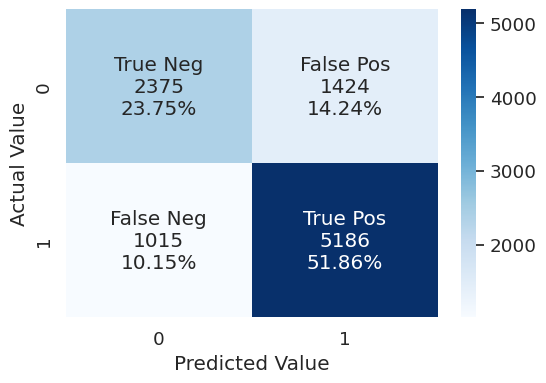

Accuracy Score  :  0.756
Precision Score :  0.785
Recall Score    :  0.836
F1 Score        :  0.81
Mean Accuracy of Model :  0.756
Standard Deviation is  :  0.008


In [56]:
from sklearn.linear_model import LogisticRegression;
log_classifier=LogisticRegression(penalty='l1',solver='liblinear');
log_classifier.fit(sc_X_train,y_train);
log_y_pred=log_classifier.predict(sc_X_test);
print("Logistic Regression Model");
heatmap_confusion_matrix(y_test,log_y_pred);
classification_metrics(y_test,log_y_pred);
k_fold_cross_validation(log_classifier,X_train,y_train,10);

#### Model Tuning using Grid Search Cv

In [57]:
parameter={'C':[0.01,0.1,1,10,100],
           'penalty':['l1','l2']};
from sklearn.model_selection import GridSearchCV;
grid=GridSearchCV(estimator=log_classifier,param_grid=parameter,scoring='accuracy',n_jobs=-1);
grid.fit(X_train,y_train);
print("Best Parameter : ",grid.best_params_);
print("Best Accuracy  : ",round(grid.best_score_,3));

Best Parameter :  {'C': 1, 'penalty': 'l1'}
Best Accuracy  :  0.756


In [58]:
parameter={'C':[2,5,10,20,50],
           'penalty':['l1','l2']};
from sklearn.model_selection import GridSearchCV;
grid_1=GridSearchCV(estimator=log_classifier,param_grid=parameter,scoring='accuracy',n_jobs=-1);
grid_1.fit(X_train,y_train);
print("Best Parameter : ",grid_1.best_params_);
print("Best Accuracy  : ",round(grid_1.best_score_,3));

Best Parameter :  {'C': 2, 'penalty': 'l1'}
Best Accuracy  :  0.756


Logistic Regression after Hyperparameter Tuning


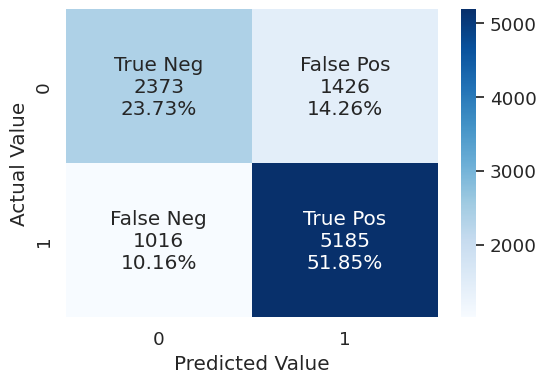

Accuracy Score  :  0.756
Precision Score :  0.785
Recall Score    :  0.836
F1 Score        :  0.81
Mean Accuracy of Model :  0.756
Standard Deviation is  :  0.008


In [59]:
y_grid=grid_1.predict(X_test);
print("Logistic Regression after Hyperparameter Tuning");
heatmap_confusion_matrix(y_test,y_grid);
classification_metrics(y_test,log_y_pred);
k_fold_cross_validation(log_classifier,X_train,y_train,10);

### Training on XGboost Model

In [60]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 3.3 MB/s eta 0:00:00


XG Boost Model Performance


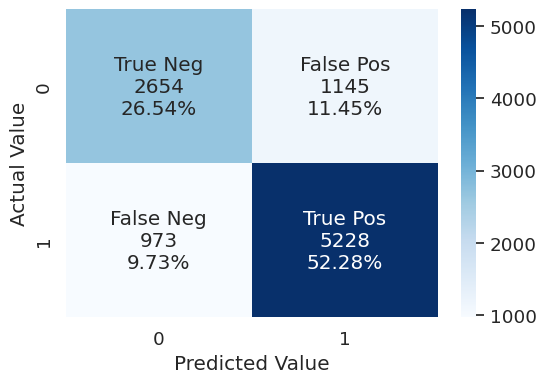

Accuracy Score  :  0.788
Precision Score :  0.82
Recall Score    :  0.843
F1 Score        :  0.832
Mean Accuracy of Model :  0.787
Standard Deviation is  :  0.005


In [61]:
from xgboost import XGBClassifier;
boost_classifier=XGBClassifier();
boost_classifier.fit(X_train,y_train);
boost_y_pred=boost_classifier.predict(X_test);
print("XG Boost Model Performance");
heatmap_confusion_matrix(y_test,boost_y_pred);
classification_metrics(y_test,boost_y_pred);
k_fold_cross_validation(boost_classifier,X_train,y_train,10);